In [1]:
""" Create table with result, raw ma10 and ols with geometries.
-------------------------------------------------------------------------------

Create postGIS table for selected basins with all ma_10 indicators

Author: Rutger Hofste
Date: 20180622
Kernel: python35
Docker: rutgerhofste/gisdocker:ubuntu16.04

"""

TESTING = 1
OVERWRITE_OUTPUT = 1
SCRIPT_NAME = 'Y2018M06D22_RH_QA_result_PostGIS_V01'
OUTPUT_VERSION = 1

DATABASE_ENDPOINT = "aqueduct30v05.cgpnumwmfcqc.eu-central-1.rds.amazonaws.com"
DATABASE_NAME = "database01"

INPUT_TABLE_NAME = 'y2018m06d04_rh_water_stress_postgis_30spfaf06_v02_v04'
GEOM_TABLE = 'hybas06_v04'
OUTPUT_TABLE_NAME = SCRIPT_NAME.lower() + "_v{:02.0f}".format(OUTPUT_VERSION)
OUTPUT_SCHEMA = "test"


In [2]:
import time, datetime, sys
dateString = time.strftime("Y%YM%mD%d")
timeString = time.strftime("UTC %H:%M")
start = datetime.datetime.now()
print(dateString,timeString)
sys.version

Y2018M06D28 UTC 10:08


'3.5.4 |Anaconda, Inc.| (default, Nov 20 2017, 18:44:38) \n[GCC 7.2.0]'

In [18]:
# imports
%matplotlib inline
import re
import os
import random
import numpy as np
import pandas as pd
import bokeh.palettes
from datetime import timedelta
from sqlalchemy import *
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show
from bokeh.models import HoverTool

d.set_option('display.max_columns', 500)

In [4]:
F = open("/.password","r")
password = F.read().splitlines()[0]
F.close()

engine = create_engine("postgresql://rutgerhofste:{}@{}:5432/{}".format(password,DATABASE_ENDPOINT,DATABASE_NAME))

In [58]:
# What to compare

sql = "SELECT *"
sql +=" FROM {}".format(INPUT_TABLE_NAME)
sql +=" WHERE pfafid_30spfaf06 = 431666"
sql +=" AND temporal_resolution = 'year'"
sql +=" LIMIT 100000"
print(sql)
df = pd.read_sql(sql,engine)



SELECT * FROM y2018m06d04_rh_water_stress_postgis_30spfaf06_v02_v04 WHERE pfafid_30spfaf06 = 431666 AND temporal_resolution = 'year' LIMIT 100000


In [59]:
df.head()


,pfafid_30spfaf06,temporal_resolution,year,month,area_m2_30spfaf06,area_count_30spfaf06,pdomww_m_30spfaf06,pdomwn_m_30spfaf06,pindww_m_30spfaf06,pindwn_m_30spfaf06,pirrww_m_30spfaf06,pirrwn_m_30spfaf06,plivww_m_30spfaf06,plivwn_m_30spfaf06,ptotww_m_30spfaf06,ptotwn_m_30spfaf06,riverdischarge_m_30spfaf06,ma10_pdomww_m_30spfaf06,min10_pdomww_m_30spfaf06,max10_pdomww_m_30spfaf06,slope10_pdomww_m_30spfaf06,intercept10_pdomww_m_30spfaf06,ols10_pdomww_m_30spfaf06,ma10_pdomwn_m_30spfaf06,min10_pdomwn_m_30spfaf06,max10_pdomwn_m_30spfaf06,slope10_pdomwn_m_30spfaf06,intercept10_pdomwn_m_30spfaf06,ols10_pdomwn_m_30spfaf06,ma10_pindww_m_30spfaf06,min10_pindww_m_30spfaf06,max10_pindww_m_30spfaf06,slope10_pindww_m_30spfaf06,intercept10_pindww_m_30spfaf06,ols10_pindww_m_30spfaf06,ma10_pindwn_m_30spfaf06,min10_pindwn_m_30spfaf06,max10_pindwn_m_30spfaf06,slope10_pindwn_m_30spfaf06,intercept10_pindwn_m_30spfaf06,ols10_pindwn_m_30spfaf06,ma10_pirrww_m_30spfaf06,min10_pirrww_m_30spfaf06,max10_pirrww_m_30spfaf06,slope10_pirrww_m_30spfaf06,intercept10_pirrww_m_30spfaf06,ols10_pirrww_m_30spfaf06,ma10_pirrwn_m_30spfaf06,min10_pirrwn_m_30spfaf06,max10_pirrwn_m_30spfaf06,slope10_pirrwn_m_30spfaf06,intercept10_pirrwn_m_30spfaf06,ols10_pirrwn_m_30spfaf06,ma10_plivww_m_30spfaf06,min10_plivww_m_30spfaf06,max10_plivww_m_30spfaf06,slope10_plivww_m_30spfaf06,intercept10_plivww_m_30spfaf06,ols10_plivww_m_30spfaf06,ma10_plivwn_m_30spfaf06,min10_plivwn_m_30spfaf06,max10_plivwn_m_30spfaf06,slope10_plivwn_m_30spfaf06,intercept10_plivwn_m_30spfaf06,ols10_plivwn_m_30spfaf06,ma10_ptotww_m_30spfaf06,min10_ptotww_m_30spfaf06,max10_ptotww_m_30spfaf06,slope10_ptotww_m_30spfaf06,intercept10_ptotww_m_30spfaf06,ols10_ptotww_m_30spfaf06,ma10_ptotwn_m_30spfaf06,min10_ptotwn_m_30spfaf06,max10_ptotwn_m_30spfaf06,slope10_ptotwn_m_30spfaf06,intercept10_ptotwn_m_30spfaf06,ols10_ptotwn_m_30spfaf06,ma10_riverdischarge_m_30spfaf06,min10_riverdischarge_m_30spfaf06,max10_riverdischarge_m_30spfaf06,slope10_riverdischarge_m_30spfaf06,intercept10_riverdischarge_m_30spfaf06,ols10_riverdischarge_m_30spfaf06,capped_ols10_pdomww_m_30spfaf06,capped_ols10_pdomwn_m_30spfaf06,capped_ols10_pindww_m_30spfaf06,capped_ols10_pindwn_m_30spfaf06,capped_ols10_pirrww_m_30spfaf06,capped_ols10_pirrwn_m_30spfaf06,capped_ols10_plivww_m_30spfaf06,capped_ols10_plivwn_m_30spfaf06,capped_ols10_ptotww_m_30spfaf06,capped_ols10_ptotwn_m_30spfaf06,capped_ols10_riverdischarge_m_30spfaf06,arid_boolean_30spfaf06,ma10_arid_boolean_30spfaf06,ols10_arid_boolean_30spfaf06,lowwateruse_boolean_30spfaf06,ma10_lowwateruse_boolean_30spfaf06,ols10_lowwateruse_boolean_30spfaf06,aridandlowwateruse_boolean_30spfaf06,ma10_aridandlowwateruse_boolean_30spfaf06,ols10_aridandlowwateruse_boolean_30spfaf06,waterstress_dimensionless_30spfaf06,ma10_waterstress_dimensionless_30spfaf06,ols10_waterstress_dimensionless_30spfaf06
0,431666,year,1960,12,2.604461e+10,38124,0.004762,0.003899,0.010208,0.002042,0.300227,0.113486,0.000561,0.000561,0.315759,0.119988,0.184364,0.004762,0.004762,0.004762,NaN,NaN,NaN,0.003899,0.003899,0.003899,NaN,NaN,NaN,0.010208,0.010208,0.010208,NaN,NaN,NaN,0.002042,0.002042,0.002042,NaN,NaN,NaN,0.300227,0.300227,0.300227,NaN,NaN,NaN,0.113486,0.113486,0.113486,NaN,NaN,NaN,0.000561,0.000561,0.000561,NaN,NaN,NaN,0.000561,0.000561,0.000561,NaN,NaN,NaN,0.315759,0.315759,0.315759,NaN,NaN,NaN,0.119988,0.119988,0.119988,NaN,NaN,NaN,0.184364,0.184364,0.184364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1.037479,1.037479,NaN
1,431666,year,1961,12,2.604461e+10,38124,0.004414,0.003591,0.009548,0.001910,0.312759,0.118223,0.000563,0.000563,0.327284,0.124286,0.276322,0.004588,0.004414,0.004762,-0.000349,0.687973,0.004414,0.003745,0.003591,0.003899,-0.000309,0.608762,0.003591,0.009878,0.009548,0.010208,-0.000660,1.304300,0.009548,0.001976,0.001910,0.002042,-0.000132,0.260860,0.001910,0.306493,0.300227,0.312759,0.012532,-24.262410,0.312759,0.115854,0.113486,0.118223,0.004737,-9.171190,0.118223,0.000562,0.000

(0.280922950837454, 2.0634608109364398)

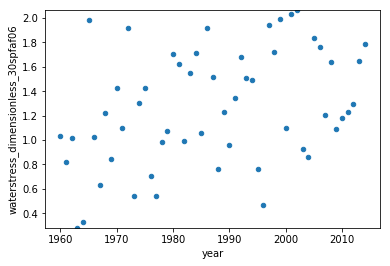

In [60]:
ax1 = df.plot.scatter("year","waterstress_dimensionless_30spfaf06")
ax1.set_ylim(df["waterstress_dimensionless_30spfaf06"].min(),df["waterstress_dimensionless_30spfaf06"].max())

In [61]:
palette = bokeh.palettes.Category20

In [62]:
output_notebook()

Loading BokehJS ...

In [63]:
p = figure(width=900, height=800)
p.line(x = df["year"], y = df["waterstress_dimensionless_30spfaf06"],color="black",legend= "10_waterstress_dimensionless_30spfaf06")
p.line(x = df["year"], y = df["ma10_waterstress_dimensionless_30spfaf06"],color="blue",legend= "ma10_waterstress_dimensionless_30spfaf06")
p.line(x = df["year"], y = df["ols10_waterstress_dimensionless_30spfaf06"],color="red",legend= "ols10_waterstress_dimensionless_30spfaf06")

p.legend.location = "top_left"
p.legend.click_policy="hide"
hover = HoverTool(tooltips = [('year', '@x'),
                             ('value',  '@y')])
p.add_tools(hover)

show(p)